# Introduction to NLP

Main building blocks of an NLP application:
- tokenization
- word embeddings
- sequence modeling
- common applications

### Lemmatization
 Lemmatization reduces words to their base or dictionary form (i.e., lemma). 

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer

In [2]:
# Завантаження ресурсів (один раз)
nltk.download("wordnet")  # https://www.nltk.org/api/nltk.corpus.reader.wordnet.html
nltk.download("omw-1.4")
nltk.download("punkt")
nltk.download("punkt_tab")

# Текст
text = (
    "Running wild cats run in the forest. They ran away when they saw a pack of wolves."
)

# Токенізація
words = nltk.word_tokenize(text)

# Ініціалізація лематизатора
lemmatizer = WordNetLemmatizer()

# Лематизація
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

print("Original words:", words)
print("Lemmatized words:", lemmatized_words)

[nltk_data] Downloading package wordnet to /home/sergio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/sergio/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/sergio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/sergio/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Original words: ['Running', 'wild', 'cats', 'run', 'in', 'the', 'forest', '.', 'They', 'ran', 'away', 'when', 'they', 'saw', 'a', 'pack', 'of', 'wolves', '.']
Lemmatized words: ['Running', 'wild', 'cat', 'run', 'in', 'the', 'forest', '.', 'They', 'ran', 'away', 'when', 'they', 'saw', 'a', 'pack', 'of', 'wolf', '.']


### Stemming
Stemming is a text processing technique that reduces words to their base or root form, called a stem. 
Stemming removes suffixes and prefixes from words to achieve this normalization.

In [3]:
import nltk
from nltk.stem import SnowballStemmer

# Sample text
text = "Running wild cats run in the forest. They ran away when they saw a pack of wolves."

# Tokenize the text into words
words = nltk.word_tokenize(text)

# Initialize PorterStemmer
stemmer = SnowballStemmer('english')

# Stem each word
stemmed_words = [stemmer.stem(word) for word in words]

print("Original words:", words)
print("Stemmed words:", stemmed_words)

Original words: ['Running', 'wild', 'cats', 'run', 'in', 'the', 'forest', '.', 'They', 'ran', 'away', 'when', 'they', 'saw', 'a', 'pack', 'of', 'wolves', '.']
Stemmed words: ['run', 'wild', 'cat', 'run', 'in', 'the', 'forest', '.', 'they', 'ran', 'away', 'when', 'they', 'saw', 'a', 'pack', 'of', 'wolv', '.']


## Tokenization

Splitting of texts into single unique units (tokens).

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.util import ngrams
nltk.download('punkt')  # https://www.nltk.org/_modules/nltk/tokenize/punkt.html

# Sample text
text = "Tokenization is an important step in natural language processing."

# Character-level tokenization
char_tokens = list(text)
print("Character-level tokenization:", char_tokens)

# Word level tokenization
word_tokens = word_tokenize(text)
print("Word level tokenization:", word_tokens)

# N-gram level tokenization
n = 2
n_grams = list(ngrams(word_tokenize(text), n))
print("N-gram level tokenization (2-grams):", n_grams)


Character-level tokenization: ['T', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'i', 'o', 'n', ' ', 'i', 's', ' ', 'a', 'n', ' ', 'i', 'm', 'p', 'o', 'r', 't', 'a', 'n', 't', ' ', 's', 't', 'e', 'p', ' ', 'i', 'n', ' ', 'n', 'a', 't', 'u', 'r', 'a', 'l', ' ', 'l', 'a', 'n', 'g', 'u', 'a', 'g', 'e', ' ', 'p', 'r', 'o', 'c', 'e', 's', 's', 'i', 'n', 'g', '.']
Word level tokenization: ['Tokenization', 'is', 'an', 'important', 'step', 'in', 'natural', 'language', 'processing', '.']
N-gram level tokenization (2-grams): [('Tokenization', 'is'), ('is', 'an'), ('an', 'important'), ('important', 'step'), ('step', 'in'), ('in', 'natural'), ('natural', 'language'), ('language', 'processing'), ('processing', '.')]


[nltk_data] Downloading package punkt to /home/sergio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ByteLevelBPE as a Trained Tokenizer:
https://towardsdatascience.com/byte-pair-encoding-subword-based-tokenization-algorithm-77828a70bee0

In [5]:
# Trained tokenizer
# BPE ensures that the most common words are represented in the vocabulary as a single token while the rare words are broken down 
# into two or more subword tokens and this is in agreement with what a subword-based tokenization algorithm does.

from tokenizers import ByteLevelBPETokenizer

# Sample text
text = """Tokenization is an important step in natural language processing.
Tokenization is an important step in NLP.
Tokenization is an important process.
Process of tokenizing text sequences is important."""

# Initialize ByteLevelBPETokenizer, used in GPT-2
# https://towardsdatascience.com/byte-pair-encoding-subword-based-tokenization-algorithm-77828a70bee0
tokenizer = ByteLevelBPETokenizer()

# Train tokenizer on text
tokenizer.train_from_iterator([text])

# Sub-word level tokenization (Byte-pair encoding)
subword_tokens = tokenizer.encode(text).tokens
print("Sub-word level tokenization (Byte-pair encoding):", subword_tokens)





Sub-word level tokenization (Byte-pair encoding): ['Tokenization', 'Ġis', 'Ġan', 'Ġimportant', 'Ġstep', 'Ġin', 'Ġ', 'n', 'at', 'u', 'r', 'a', 'l', 'Ġ', 'l', 'an', 'g', 'u', 'a', 'g', 'e', 'Ġprocess', 'ing', '.', 'Ċ', 'Tokenization', 'Ġis', 'Ġan', 'Ġimportant', 'Ġstep', 'Ġin', 'Ġ', 'N', 'L', 'P', '.', 'Ċ', 'Tokenization', 'Ġis', 'Ġan', 'Ġimportant', 'Ġprocess', '.', 'Ċ', 'P', 'rocess', 'Ġ', 'o', 'f', 'Ġ', 't', 'okeniz', 'ing', 'Ġ', 'te', 'x', 't', 'Ġs', 'e', 'q', 'u', 'en', 'ces', 'Ġis', 'Ġimportant', '.']


In [6]:
len(tokenizer.get_vocab())

292

In [7]:
tokenizer.get_vocab()

{'æ': 162,
 'Ě': 214,
 'å': 161,
 'ken': 262,
 'M': 44,
 'S': 50,
 '±': 109,
 'Ò': 142,
 'Â': 126,
 'Ï': 139,
 '/': 14,
 'Ķ': 242,
 'ß': 155,
 'tep': 289,
 'Ć': 194,
 'Tokenizatio': 282,
 'z': 89,
 'en': 258,
 '`': 63,
 ';': 26,
 'L': 43,
 'Ŀ': 251,
 '=': 28,
 'atio': 281,
 '½': 121,
 'ģ': 223,
 '¥': 98,
 'ĭ': 233,
 't': 83,
 ',': 11,
 '^': 61,
 'ĳ': 239,
 '7': 22,
 '¢': 95,
 'Ġimp': 268,
 '¼': 120,
 'D': 35,
 'è': 164,
 'ĸ': 244,
 'Ń': 255,
 'u': 84,
 'ć': 195,
 '·': 115,
 'w': 86,
 '_': 62,
 '´': 112,
 'û': 183,
 'Ġs': 279,
 'Ô': 144,
 'Ĝ': 216,
 'Ú': 150,
 'ø': 180,
 'ä': 160,
 ':': 25,
 'Į': 234,
 'q': 80,
 'Q': 48,
 'Ë': 135,
 'Å': 129,
 'ĥ': 225,
 'Ľ': 249,
 '<': 27,
 'ª': 103,
 'process': 286,
 'ö': 178,
 'ċ': 199,
 'v': 85,
 'X': 55,
 '.': 13,
 '÷': 179,
 'Ĩ': 228,
 'Ĭ': 232,
 'Ė': 210,
 'Ą': 192,
 'ą': 193,
 'oken': 265,
 'ľ': 250,
 'or': 264,
 '4': 19,
 'l': 75,
 'O': 46,
 'ê': 166,
 'Ī': 230,
 '£': 96,
 '9': 24,
 'É': 133,
 'Ļ': 247,
 'ó': 175,
 'Ħ': 226,
 'İ': 236,
 'ù': 18

In [8]:
tokenizer.id_to_token(260)

'ce'

Training your own tokenizer: https://huggingface.co/learn/nlp-course/en/chapter6/8

In [9]:
# Training from scratch
## WordPiece Tokenizer: https://huggingface.co/learn/nlp-course/en/chapter6/6

from tokenizers import (
    decoders,
    models,
    normalizers,
    pre_tokenizers,
    processors,
    trainers,
    Tokenizer,
)
from tokenizers.pre_tokenizers import Whitespace


tokenizer = Tokenizer(models.WordPiece(unk_token="[UNK]"))

tokenizer.normalizer = normalizers.Sequence(
    [normalizers.NFD(), normalizers.Lowercase(), normalizers.StripAccents()]
)

print(tokenizer.normalizer.normalize_str("Héllò hôw are ü?"))


hello how are u?


In [10]:
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
tokenizer.pre_tokenizer.pre_tokenize_str("Let's test my pre-tokenizer.")

[('Let', (0, 3)),
 ("'", (3, 4)),
 ('s', (4, 5)),
 ('test', (6, 10)),
 ('my', (11, 13)),
 ('pre', (14, 17)),
 ('-', (17, 18)),
 ('tokenizer', (18, 27)),
 ('.', (27, 28))]

In [11]:
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "The cat sits on the window sill",
    "The dog barks loudly in the night",
    "Birds of a feather flock together",
    "Tokenization is an important step in natural language processing.",
    "Tokenization is an important step in NLP.",
    "Tokenization is an important process.",
    "Process of tokenizing text sequences is important."
]
special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"]  # BERT
trainer = trainers.WordPieceTrainer(vocab_size=1000, special_tokens=special_tokens)
tokenizer.train_from_iterator(corpus, trainer=trainer)
tokenizer.decoder = decoders.WordPiece(prefix="##")
tokenizer.save("./tokenizer-trained.json")
#tokenizer = Tokenizer.from_file("./tokenizer-trained.json")

In [12]:
encoding = tokenizer.encode("The quick brown fox")
print(encoding.tokens)

['the', 'quick', 'brown', 'fox']


In [13]:
encoding.ids

[57, 162, 150, 153]

In [14]:
tokenizer.decode(encoding.ids)

'the quick brown fox'

In [15]:
tokenizer.get_vocab()

{'##ation': 83,
 'bro': 100,
 'fe': 102,
 'e': 10,
 '##ing': 95,
 '##ge': 92,
 'loud': 156,
 '##ck': 93,
 '##mps': 143,
 '##ura': 127,
 '##h': 45,
 'dog': 96,
 'loudly': 169,
 'nl': 109,
 '##ort': 68,
 'o': 20,
 'natura': 160,
 'v': 27,
 '##ther': 124,
 '##ick': 134,
 'jumps': 154,
 '##n': 35,
 '##c': 48,
 'together': 166,
 'f': 11,
 'imp': 64,
 'do': 87,
 '[CLS]': 2,
 '##wn': 139,
 '##at': 58,
 '##f': 47,
 'sits': 146,
 '##r': 34,
 '##g': 44,
 'natural': 171,
 '##en': 60,
 '##ro': 67,
 '##e': 33,
 '##ion': 82,
 '##ts': 123,
 '[UNK]': 0,
 '##v': 32,
 'j': 15,
 'tokenization': 85,
 'is': 63,
 '##w': 53,
 'birds': 168,
 'lo': 107,
 'si': 90,
 'the': 57,
 '##ll': 129,
 '##l': 39,
 '##ken': 71,
 'night': 170,
 '##in': 81,
 'st': 89,
 'tokenizing': 144,
 'ba': 98,
 'lazy': 155,
 'ju': 105,
 '.': 5,
 '##quen': 140,
 'l': 17,
 'in': 78,
 'k': 16,
 'nigh': 159,
 '[MASK]': 4,
 '##i': 42,
 'text': 164,
 '##on': 80,
 '##ces': 70,
 '##he': 56,
 '##cess': 84,
 'quick': 162,
 'to': 59,
 'win': 117,


In [16]:
tokenizer.get_vocab_size()

173

# Text Embeddings

https://www.deepset.ai/blog/the-beginners-guide-to-text-embeddings

## Sparse (розріджені) vectors: One hot encoding, Bag of words, Tf-idf

In [17]:
from nltk.tokenize import word_tokenize
import numpy as np
import nltk

# Sample text
text = "The quick brown fox jumps over the lazy dog"

# Tokenize the text
tokens = word_tokenize(text.lower())
print("tokens", tokens)
# Create vocabulary
vocab = sorted(set(tokens))
print("vocab", vocab)

tokens ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
vocab ['brown', 'dog', 'fox', 'jumps', 'lazy', 'over', 'quick', 'the']


In [18]:
# Create one-hot encoding
one_hot_encoded = []
for token in tokens:
    one_hot_vector = [0] * len(vocab)
    one_hot_vector[vocab.index(token)] = 1
    one_hot_encoded.append(one_hot_vector)
one_hot_encoded

[[0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0]]

In [19]:
# Convert to numpy array for easier manipulation
one_hot_encoded = np.array(one_hot_encoded)

# Print results
print("Original text:", text)
print("Tokens:", tokens)
print("Vocabulary:", vocab)
print("One-hot encoded text:\n", one_hot_encoded)

Original text: The quick brown fox jumps over the lazy dog
Tokens: ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Vocabulary: ['brown', 'dog', 'fox', 'jumps', 'lazy', 'over', 'quick', 'the']
One-hot encoded text:
 [[0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0]]


In [20]:
# Bag of words

# Initialize Bag of Words
bow = np.zeros(len(vocab))

# Count occurrences of each word
for token in tokens:
    bow[vocab.index(token)] += 1

# Print results
print("Original text:", text)
print("Tokens:", tokens)
print("Vocabulary:", vocab)
print("Bag of Words:\n", bow)

# And just like that, we have managed to encode our text as a vector 
# (also known as a “bag of words” or “BoW” embedding — because it ignores the order of the words in the sentence).

Original text: The quick brown fox jumps over the lazy dog
Tokens: ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Vocabulary: ['brown', 'dog', 'fox', 'jumps', 'lazy', 'over', 'quick', 'the']
Bag of Words:
 [1. 1. 1. 1. 1. 1. 1. 2.]


In [21]:
# TF-idf
# see module 7 lesson 1
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample corpus
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "The cat sits on the window sill",
    "The dog barks loudly in the night",
    "Birds of a feather flock together"
]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Get feature names (vocabulary)
vocab = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to dense array for easier manipulation
tfidf_matrix_dense = tfidf_matrix.toarray()

# Print results
print("Sample corpus:", corpus)
print("Vocabulary:", vocab)
print("TF-IDF matrix:\n", tfidf_matrix_dense)


Sample corpus: ['The quick brown fox jumps over the lazy dog', 'The cat sits on the window sill', 'The dog barks loudly in the night', 'Birds of a feather flock together']
Vocabulary: ['barks' 'birds' 'brown' 'cat' 'dog' 'feather' 'flock' 'fox' 'in' 'jumps'
 'lazy' 'loudly' 'night' 'of' 'on' 'over' 'quick' 'sill' 'sits' 'the'
 'together' 'window']
TF-IDF matrix:
 [[0.         0.         0.34812928 0.         0.27446912 0.
  0.         0.34812928 0.         0.34812928 0.34812928 0.
  0.         0.         0.         0.34812928 0.34812928 0.
  0.         0.44441281 0.         0.        ]
 [0.         0.         0.         0.38837832 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.38837832 0.         0.         0.38837832
  0.38837832 0.4957937  0.         0.38837832]
 [0.39996052 0.         0.         0.         0.31533346 0.
  0.         0.         0.39996052 0.         0.         0.39996052
  0.39996052 0.         0.         0.       

### Cosine similarity


![cosine](https://storage.googleapis.com/lds-media/images/cosine-similarity-vectors.original.jpg)
Source: https://www.learndatasci.com/glossary/cosine-similarity/

In [22]:
# show vector similarity
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Sample vectors
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])

# Reshape the vectors to ensure they are 2D arrays
vector1 = vector1.reshape(1, -1)
vector2 = vector2.reshape(1, -1)

# Compute cosine similarity
similarity = cosine_similarity(vector1, vector2)

print("Vector 1:", vector1)
print("Vector 2:", vector2)
print("Cosine similarity:", similarity[0][0])


Vector 1: [[1 2 3]]
Vector 2: [[4 5 6]]
Cosine similarity: 0.9746318461970762


![formula](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*LfW66-WsYkFqWc4XYJbEJg.png)

In [23]:
def cosine_similarity(u, v):
    """
    Cosine similarity reflects the degree of similarity between u and v
        
    Arguments:
        u -- a word vector of shape (n,)          
        v -- a word vector of shape (n,)

    Returns:
        cosine_similarity -- the cosine similarity between u and v defined by the formula above.
    """
    
    # Special case. Consider the case u = [0, 0], v=[0, 0]
    if np.all(u == v):
        return 1
    
    # Compute the dot product between u and v (≈1 line)
    dot = np.dot(u, v) 
    # Compute the L2 norm of u (≈1 line)
    norm_u = np.sqrt(np.sum(np.dot(u,u)))
    
    # Compute the L2 norm of v (≈1 line)
    norm_v = np.sqrt(np.sum(np.dot(v,v)))
    
    # Avoid division by 0
    if np.isclose(norm_u * norm_v, 0, atol=1e-32):
        return 0
    
    # Compute the cosine similarity defined by formula (1) (≈1 line)
    cosine_similarity = dot / (norm_u * norm_v)

    return cosine_similarity

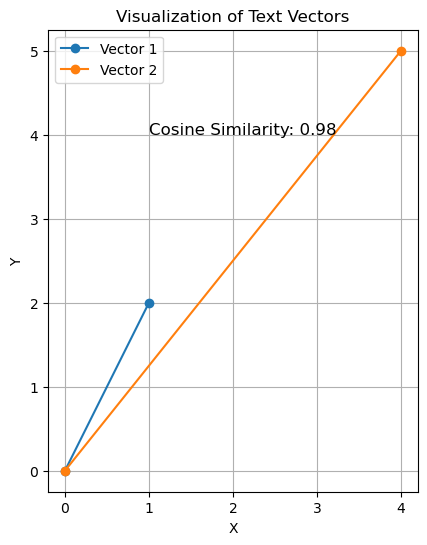

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Sample text vectors
vector1 = np.array([1, 2])
vector2 = np.array([4, 5])

# Reshape the vectors to ensure they are 2D arrays
vector1 = vector1.reshape(1, -1)
vector2 = vector2.reshape(1, -1)

# Compute cosine similarity
similarity = cosine_similarity(vector1, vector2)[0][0]

# Plot vectors
plt.figure(figsize=(8, 6))
plt.plot([0, vector1[0][0]], [0, vector1[0][1]], label='Vector 1', marker='o')
plt.plot([0, vector2[0][0]], [0, vector2[0][1]], label='Vector 2', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualization of Text Vectors')
plt.legend()

# Annotate cosine similarity
plt.text(1, 4, f'Cosine Similarity: {similarity:.2f}', fontsize=12)

# Set aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

# Show plot
plt.grid()
plt.show()


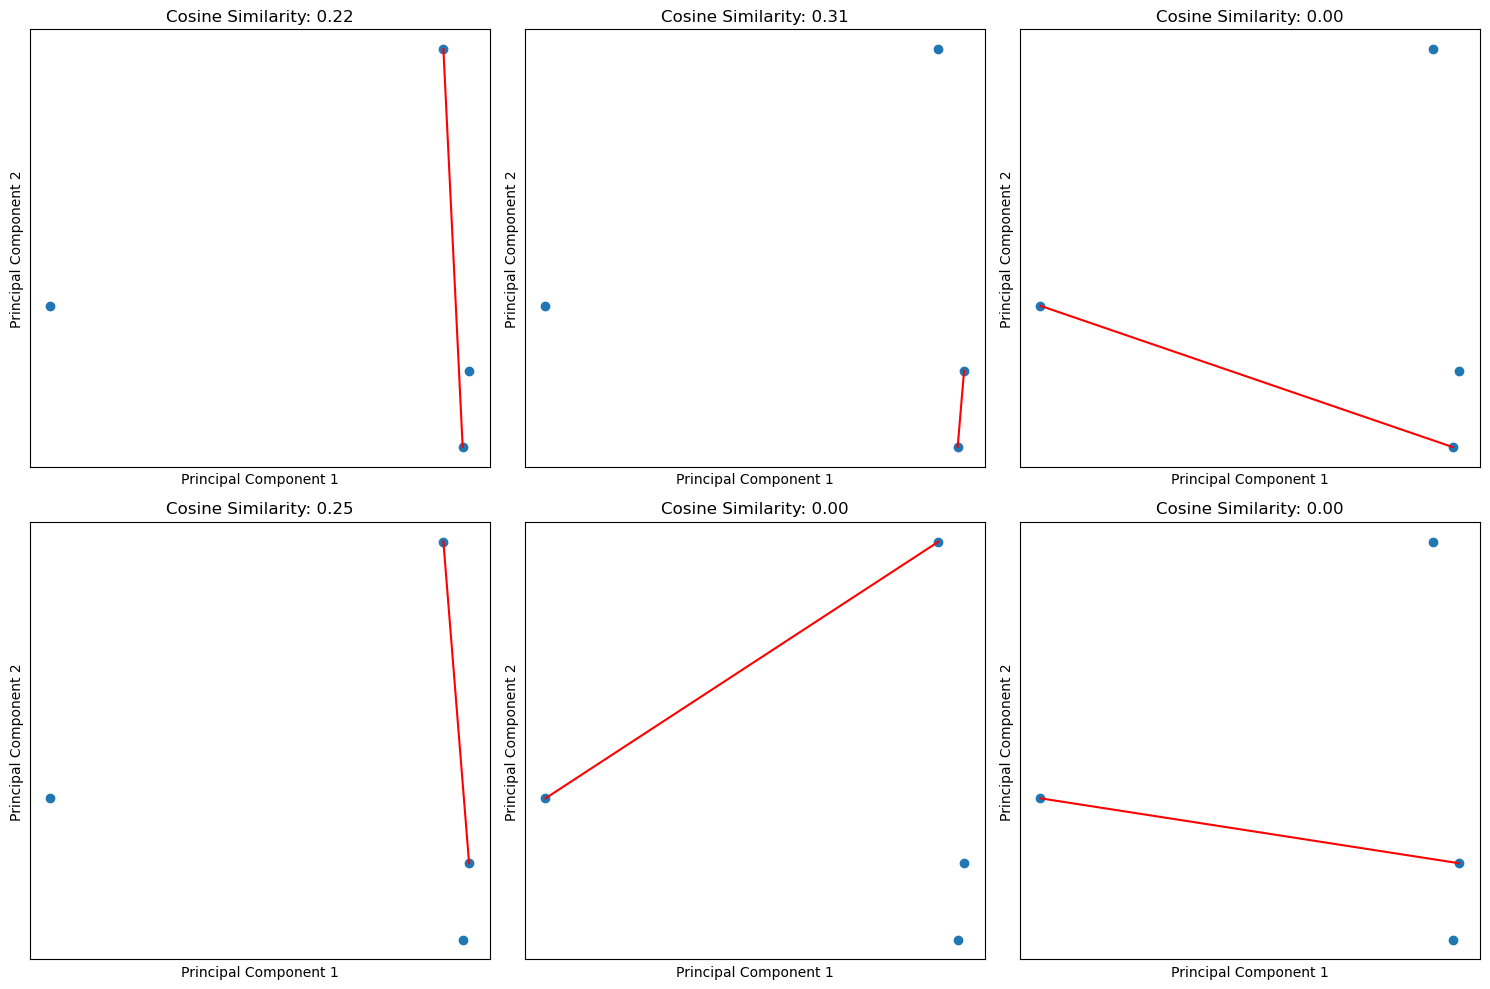

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Sample corpus
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "The cat sits on the window sill",
    "The dog barks loudly in the night",
    "Birds of a feather flock together"
]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Convert TF-IDF matrix to dense array for easier manipulation
tfidf_matrix_dense = tfidf_matrix.toarray()

# Compute cosine similarity
cos_sim = cosine_similarity(tfidf_matrix_dense)

# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix_dense)

# Plot one graph per pair of text
num_pairs = len(corpus) * (len(corpus) - 1) // 2
plt.figure(figsize=(15, 10))
subplot_index = 1
for i in range(len(corpus)):
    for j in range(i + 1, len(corpus)):
        plt.subplot(2, num_pairs // 2, subplot_index)
        plt.scatter(tfidf_matrix_pca[:, 0], tfidf_matrix_pca[:, 1])
        plt.plot([tfidf_matrix_pca[i, 0], tfidf_matrix_pca[j, 0]], 
                 [tfidf_matrix_pca[i, 1], tfidf_matrix_pca[j, 1]], 
                 linestyle='-', color='red')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'Cosine Similarity: {cos_sim[i, j]:.2f}')
        plt.xticks([])
        plt.yticks([])
        subplot_index += 1
plt.tight_layout()
plt.show()


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Sample corpus
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "The cat sits on the window sill",
    "The dog barks loudly in the night",
    "Birds of a feather flock together"
]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Convert TF-IDF matrix to dense array for easier manipulation
tfidf_matrix_dense = tfidf_matrix.toarray()

# Compute cosine similarity
cos_sim = cosine_similarity(tfidf_matrix_dense)

for i in range(len(corpus)):
    for j in range(i + 1, len(corpus)):
        print(f'Text: {corpus[i]}, \n{corpus[j]}\nCosine Similarity: {cos_sim[i, j]:.2f}.\n')



Text: The quick brown fox jumps over the lazy dog, 
The cat sits on the window sill
Cosine Similarity: 0.22.

Text: The quick brown fox jumps over the lazy dog, 
The dog barks loudly in the night
Cosine Similarity: 0.31.

Text: The quick brown fox jumps over the lazy dog, 
Birds of a feather flock together
Cosine Similarity: 0.00.

Text: The cat sits on the window sill, 
The dog barks loudly in the night
Cosine Similarity: 0.25.

Text: The cat sits on the window sill, 
Birds of a feather flock together
Cosine Similarity: 0.00.

Text: The dog barks loudly in the night, 
Birds of a feather flock together
Cosine Similarity: 0.00.



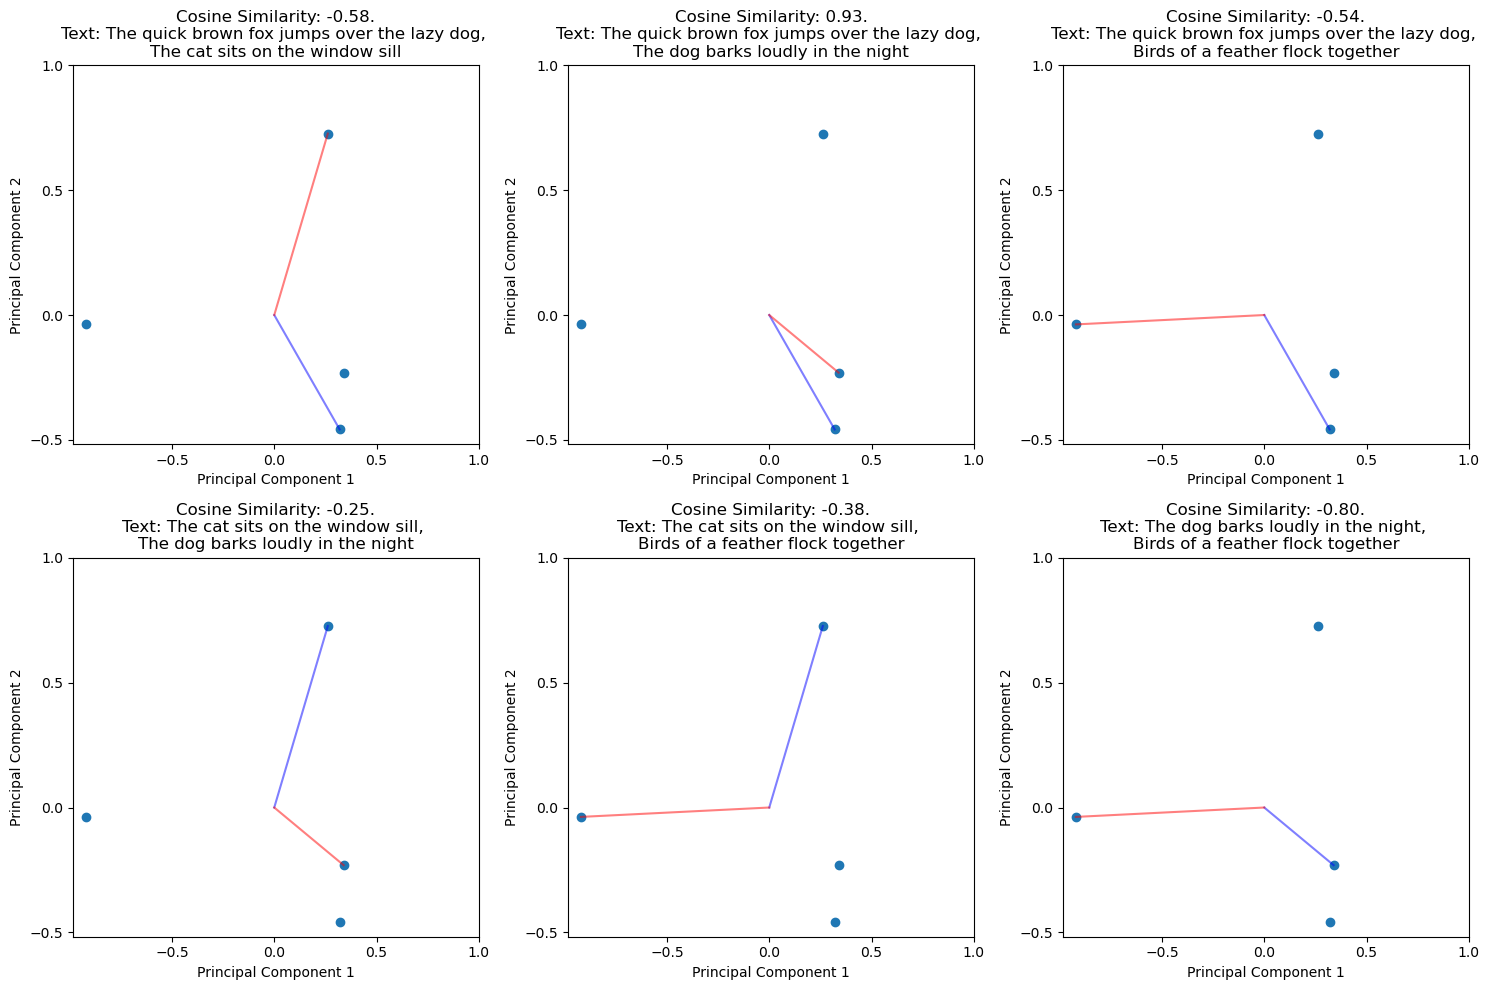

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Sample corpus
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "The cat sits on the window sill",
    "The dog barks loudly in the night",
    "Birds of a feather flock together"
]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Convert TF-IDF matrix to dense array for easier manipulation
tfidf_matrix_dense = tfidf_matrix.toarray()

# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix_dense)

# Compute cosine similarity
cos_sim = cosine_similarity(tfidf_matrix_pca)

# Plot one graph per pair of text
num_pairs = len(corpus) * (len(corpus) - 1) // 2
plt.figure(figsize=(15, 10))
subplot_index = 1
for i in range(len(corpus)):
    for j in range(i + 1, len(corpus)):
        plt.subplot(2, num_pairs // 2, subplot_index)
        plt.scatter(tfidf_matrix_pca[:, 0], tfidf_matrix_pca[:, 1])
        plt.plot([0, tfidf_matrix_pca[i, 0]], 
                 [0, tfidf_matrix_pca[i, 1]], 
                 linestyle='-', color='blue', alpha=0.5)
        plt.plot([0, tfidf_matrix_pca[j, 0]], 
                 [0, tfidf_matrix_pca[j, 1]], 
                 linestyle='-', color='red', alpha=0.5)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'Cosine Similarity: {cos_sim[i, j]:.2f}.\nText: {corpus[i]}, \n{corpus[j]}')
        plt.xticks(np.arange(-0.5, 1.5, 0.5))
        plt.yticks(np.arange(-0.5, 1.5, 0.5))
        subplot_index += 1
plt.tight_layout()
plt.show()



## Word2Vec
https://www.tensorflow.org/text/tutorials/word2vec

In [28]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Sample corpus
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "The cat sits on the window sill",
    "The dog barks loudly in the night",
    "Birds of a feather flock together"
]

# Tokenize the corpus
tokenized_corpus = [word_tokenize(doc.lower()) for doc in corpus]

# Define Word2Vec model parameters
vector_size = 100  # Dimensionality of word vectors
window_size = 5  # Context window size
min_count = 1  # Minimum frequency count of words

# Initialize Word2Vec model
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=vector_size,
    window=window_size,
    min_count=min_count,
    sg=1  # Use Skip-gram model
)

# Train Word2Vec model
model.train(tokenized_corpus, total_examples=len(tokenized_corpus), epochs=10)

# Save trained model
model.save("word2vec_model.bin")

# To load the trained model:
# loaded_model = Word2Vec.load("word2vec_model.bin")


In [29]:
model.get_latest_training_loss()

0.0

In [30]:
vocab = model.wv.index_to_key
vocab

['the',
 'dog',
 'together',
 'a',
 'of',
 'flock',
 'feather',
 'night',
 'birds',
 'in',
 'loudly',
 'window',
 'on',
 'barks',
 'sill',
 'cat',
 'sits',
 'over',
 'lazy',
 'jumps',
 'fox',
 'brown',
 'quick']

In [31]:
model.wv.key_to_index

{'the': 0,
 'dog': 1,
 'together': 2,
 'a': 3,
 'of': 4,
 'flock': 5,
 'feather': 6,
 'night': 7,
 'birds': 8,
 'in': 9,
 'loudly': 10,
 'window': 11,
 'on': 12,
 'barks': 13,
 'sill': 14,
 'cat': 15,
 'sits': 16,
 'over': 17,
 'lazy': 18,
 'jumps': 19,
 'fox': 20,
 'brown': 21,
 'quick': 22}

In [32]:
# Sample text to encode
text = "This fox is a very quick fox"

# Tokenize the text
tokens = word_tokenize(text.lower())

# Encode the text
word_vectors = [model.wv[word] for word in tokens if word in model.wv.key_to_index.keys()]

# Average the word vectors to get the text encoding
if word_vectors:
    encoded_text = np.mean(word_vectors, axis=0)
else:
    encoded_text = np.zeros(model.vector_size)  # Default encoding for empty text

# Print the encoded text
print("Encoded text:", encoded_text)

Encoded text: [-8.3293137e-04  3.8035577e-03 -7.8900036e-04  6.6896062e-03
  2.6861897e-03 -3.4418900e-04 -1.9891659e-04  2.7066753e-03
  3.9822692e-03 -4.2067464e-03  2.6167543e-03 -8.5690437e-04
  5.2051437e-03  1.2417476e-03  5.4620653e-03 -1.5606792e-03
 -1.6742534e-03  1.4937525e-03 -2.8683532e-03  2.0120498e-03
  8.7027345e-04  2.6493692e-03 -4.0516737e-03  9.0593919e-03
 -1.4621578e-03  9.1136433e-05  1.5048312e-03  1.5456827e-03
 -1.7181190e-03 -2.4771763e-03 -1.5961041e-03 -4.0973169e-03
 -3.2131518e-03 -6.3508068e-04  2.4579820e-04  5.5099172e-03
  5.7274047e-03  2.4000523e-03 -3.9315638e-03  5.8517978e-03
  3.8218547e-03 -7.4054312e-04 -4.8926570e-03  2.1338102e-03
 -1.4704198e-04 -4.9571460e-03 -2.3560529e-03 -2.6442469e-03
  4.2017642e-04  4.2863988e-04  6.4658737e-03 -4.5496067e-03
 -3.8693387e-03 -1.8835061e-03 -3.5121590e-03  5.6184391e-03
  1.3598823e-03 -9.1684348e-04 -2.4944388e-03 -3.9335825e-03
 -2.6053486e-03  4.7478536e-03  5.7097008e-03 -2.8676251e-03
 -1.989668

In [33]:
model.wv["fox"]

array([ 0.00257213,  0.00084554, -0.00253884,  0.00935984,  0.00275857,
        0.00409201, -0.00118103,  0.00090791,  0.00662063, -0.00073159,
        0.00334115, -0.00067463,  0.00524853,  0.00364298,  0.00258579,
       -0.00530737, -0.00470402,  0.0043109 , -0.00590666, -0.00018275,
       -0.00063132,  0.00349136, -0.00844036,  0.00881241, -0.00144759,
       -0.00532967,  0.00404997, -0.00193355, -0.0077641 , -0.00449426,
       -0.00038436, -0.00894708,  0.00057117,  0.00244037, -0.00322494,
        0.00257146,  0.00248132,  0.00999091,  0.00143265,  0.00201964,
        0.00278154, -0.0020805 , -0.00869888,  0.00802661, -0.00197591,
       -0.00969148, -0.0065538 , -0.00394705,  0.00395808,  0.00503932,
        0.00608432, -0.00677428,  0.00068771, -0.00277554, -0.00520815,
        0.00698639,  0.00395256, -0.00310465, -0.00827376, -0.00513728,
       -0.00065105,  0.00781343,  0.00604564, -0.00845029, -0.00956471,
        0.00713903, -0.00232649, -0.00369122,  0.00575078, -0.00

In [34]:
word_vectors

[array([ 0.00257213,  0.00084554, -0.00253884,  0.00935984,  0.00275857,
         0.00409201, -0.00118103,  0.00090791,  0.00662063, -0.00073159,
         0.00334115, -0.00067463,  0.00524853,  0.00364298,  0.00258579,
        -0.00530737, -0.00470402,  0.0043109 , -0.00590666, -0.00018275,
        -0.00063132,  0.00349136, -0.00844036,  0.00881241, -0.00144759,
        -0.00532967,  0.00404997, -0.00193355, -0.0077641 , -0.00449426,
        -0.00038436, -0.00894708,  0.00057117,  0.00244037, -0.00322494,
         0.00257146,  0.00248132,  0.00999091,  0.00143265,  0.00201964,
         0.00278154, -0.0020805 , -0.00869888,  0.00802661, -0.00197591,
        -0.00969148, -0.0065538 , -0.00394705,  0.00395808,  0.00503932,
         0.00608432, -0.00677428,  0.00068771, -0.00277554, -0.00520815,
         0.00698639,  0.00395256, -0.00310465, -0.00827376, -0.00513728,
        -0.00065105,  0.00781343,  0.00604564, -0.00845029, -0.00956471,
         0.00713903, -0.00232649, -0.00369122,  0.0

In [35]:
# Sample corpus
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "The cat sits on the window sill",
    "The dog barks loudly in the night",
    "Birds of a feather flock together"
]

embeddings = np.zeros((len(corpus), model.vector_size))

for i in range(len(corpus)):
    # Tokenize the text
    tokens = word_tokenize(corpus[i].lower())
    
    # Encode the text
    word_vectors = [model.wv[word] for word in tokens if word in model.wv.key_to_index.keys()]
    
    # Average the word vectors to get the text encoding
    if word_vectors:
        encoded_text = np.mean(word_vectors, axis=0)
    else:
        encoded_text = np.zeros(model.vector_size)  # Default encoding for empty text
    embeddings[i] = encoded_text

print(embeddings)


[[ 1.24294136e-03  2.06322805e-03  2.59387167e-03  5.99527545e-03
  -1.18522323e-03 -2.24979874e-03  2.99117388e-03  3.77638638e-03
  -2.06815661e-03 -3.55113181e-03  9.14662145e-04 -2.37691542e-03
   2.87460163e-03  3.97960376e-03  1.70151726e-03 -1.04033086e-03
   2.38553528e-03  1.42929377e-03 -1.14246993e-03 -2.36563804e-03
   3.14331008e-03  1.27603969e-04 -1.72621536e-03 -4.00996360e-04
   2.41280464e-03  5.58046042e-04 -3.45374062e-03  1.60675775e-03
   2.83260481e-04  5.89457341e-05 -1.92339634e-04 -1.94719411e-03
   1.13883882e-03 -3.89126269e-03 -1.82479445e-04  1.52210833e-03
   1.91323319e-03 -1.27970139e-04  1.09256327e-03 -1.35928497e-03
   2.26722826e-04 -7.75320572e-04 -2.41473736e-03  1.41968206e-03
  -2.32083234e-03 -1.54263759e-03 -3.02405283e-03 -2.77230167e-04
   1.94860273e-03  2.18482758e-03  7.09844520e-04 -9.47433407e-04
  -3.20862117e-03  2.85481045e-04  2.73053697e-03  2.64428509e-03
   2.58761179e-03 -1.16618047e-03 -5.34905237e-04  2.02054600e-03
  -3.32789

In [36]:
# Compute cosine similarity
cos_sim = cosine_similarity(embeddings)
for i in range(len(corpus)):
    for j in range(i + 1, len(corpus)):
        print(f'Text: {corpus[i]}, \n{corpus[j]}\nCosine Similarity: {cos_sim[i, j]:.2f}.\n')

Text: The quick brown fox jumps over the lazy dog, 
The cat sits on the window sill
Cosine Similarity: 0.53.

Text: The quick brown fox jumps over the lazy dog, 
The dog barks loudly in the night
Cosine Similarity: 0.59.

Text: The quick brown fox jumps over the lazy dog, 
Birds of a feather flock together
Cosine Similarity: -0.09.

Text: The cat sits on the window sill, 
The dog barks loudly in the night
Cosine Similarity: 0.57.

Text: The cat sits on the window sill, 
Birds of a feather flock together
Cosine Similarity: -0.09.

Text: The dog barks loudly in the night, 
Birds of a feather flock together
Cosine Similarity: -0.15.



In [37]:
cos_sim

array([[ 1.        ,  0.52579893,  0.59190877, -0.08741439],
       [ 0.52579893,  1.        ,  0.56873798, -0.09239434],
       [ 0.59190877,  0.56873798,  1.        , -0.14716998],
       [-0.08741439, -0.09239434, -0.14716998,  1.        ]])

In [39]:
# Training of Skip-gram model
# source: https://colab.research.google.com/drive/1IxAnnFSqk3mL3A8n1PKYWdEzDSd2Y9rF?usp=sharing#scrollTo=13xBa01XEnpb

import numpy as np
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten

# Set up the training data
sentences = [["I", "love", "machine", "learning"],
             ["I", "like", "deep", "learning"],
             ["I", "enjoy", "neural", "networks"]]

# Create the skip-gram dataset
skip_gram_pairs = []
window_size = 2

for sentence in sentences:
    for i in range(len(sentence)):
        target_word = sentence[i]
        for j in range(i - window_size, i + window_size + 1):
            if j >= 0 and j < len(sentence) and j != i:
                context_word = sentence[j]
                skip_gram_pairs.append((target_word, context_word))

# Create word-to-index and index-to-word mappings
word_to_index = {}
index_to_word = {}
index = 0

for sentence in sentences:
    for word in sentence:
        if word not in word_to_index:
            word_to_index[word] = index
            index_to_word[index] = word
            index += 1

# Convert skip-gram pairs to indices
skip_gram_pairs_indices = []
for pair in skip_gram_pairs:
    target_index = word_to_index[pair[0]]
    context_index = word_to_index[pair[1]]
    skip_gram_pairs_indices.append((target_index, context_index))

# Define the model
vocab_size = len(word_to_index)
embedding_dim = 10

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=1))
model.add(Flatten())
model.add(Dense(vocab_size, activation='softmax'))

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam')
target_words = []
context_words = []

for pair in skip_gram_pairs_indices:
    target_words.append(pair[0])
    context_words.append(pair[1])

target_words = np.array(target_words)
context_words = np.array(context_words)

model.fit(target_words, tf.keras.utils.to_categorical(context_words, num_classes=vocab_size), epochs=100)

# Get the word embeddings
embeddings = model.get_weights()[0]

# Print the word embeddings
for i in range(vocab_size):
    word = index_to_word[i]
    embedding = embeddings[i]
    print(f"Word: {word}, Embedding: {embedding}")

Epoch 1/100


/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-08-01 18:00:35.136106: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 2.1998
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1983
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1968
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1953
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1938
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1924
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1909
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1894
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.1879
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1864
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1850
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.1835
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1820
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1805
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1791
Epoch 16/100
1/1 ━━━━━━━━━━━━━

### Pretrained embeddings: GloVe

https://nlp.stanford.edu/projects/glove/

https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

In [41]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [42]:
len(embeddings_dict["the"])

50

In [43]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))


In [44]:
find_closest_embeddings(embeddings_dict["king"])[1:10]

['prince',
 'queen',
 'uncle',
 'ii',
 'grandson',
 'brother',
 'kingdom',
 'son',
 'nephew']

In [45]:
find_closest_embeddings(
        embeddings_dict["king"] - embeddings_dict["man"] + embeddings_dict["woman"]
)[1:5]

['queen', 'prince', 'elizabeth', 'daughter']

In [46]:
find_closest_embeddings(
        embeddings_dict["ukraine"] - embeddings_dict["country"] + embeddings_dict["city"]
)[1:7]

['kharkiv', 'bucharest', 'ukraine', 'prague', 'lviv', 'vladivostok']

In [47]:
find_closest_embeddings(
        embeddings_dict["germany"] - embeddings_dict["country"] + embeddings_dict["city"]
)[1:5]

['munich', 'hamburg', 'berlin', 'stuttgart']

In [48]:
find_closest_embeddings(
        embeddings_dict["cat"] - embeddings_dict["home"] + embeddings_dict["wild"]
)[1:5]

['frog', 'shark', 'cat', 'scaredy']

In [49]:
find_closest_embeddings(
        embeddings_dict["kiev"] - embeddings_dict["ukraine"] + embeddings_dict["germany"]
)[1:5]

['berlin', 'cologne', 'stuttgart', 'hamburg']

In [50]:
find_closest_embeddings(
        embeddings_dict["bird"] - embeddings_dict["air"] + embeddings_dict["water"]
)[1:5]

['fish', 'tree', 'animal', 'bird']

In [51]:
find_closest_embeddings(
        embeddings_dict["windows"] - embeddings_dict["microsoft"] + embeddings_dict["apple"]
)[1:5]

['window', 'boxes', 'cardboard', 'kitchen']

In [52]:
# Sample corpus
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "The cat sits on the window sill",
    "The dog barks loudly in the night",
    "Birds of a feather flock together"
]

embeddings = np.zeros((len(corpus), 50))

for i in range(len(corpus)):
    # Tokenize the text
    tokens = word_tokenize(corpus[i].lower())
    
    # Encode the text
    word_vectors = [embeddings_dict[word] for word in tokens if word in embeddings_dict]
    
    # Average the word vectors to get the text encoding
    if word_vectors:
        encoded_text = np.mean(word_vectors, axis=0)
    else:
        encoded_text = np.zeros(model.vector_size)  # Default encoding for empty text
    embeddings[i] = encoded_text

print(embeddings)

[[ 3.93333286e-03 -5.56961149e-02 -1.51158884e-01 -8.01386535e-02
   2.62414455e-01  2.65154570e-01 -6.12281084e-01 -1.40996873e-01
   1.06377952e-01 -2.16462210e-01 -2.38425493e-01  7.30807930e-02
  -1.64806664e-01  3.09114337e-01  1.57798350e-01 -6.94216192e-02
   1.78868115e-01 -1.32255793e-01 -7.85085559e-01 -4.17248875e-01
  -1.32401779e-01  1.65824682e-01  3.64152253e-01 -3.08002103e-02
   2.25197762e-01 -1.31351554e+00 -2.78055459e-01  3.85458469e-01
   2.17421904e-01 -2.93188900e-01  2.54780030e+00  1.99565783e-01
  -2.43751451e-01  1.56158879e-01 -5.66335246e-02 -8.68625939e-02
  -6.80229962e-02 -5.18795587e-02  4.77540046e-02 -5.02376258e-01
  -1.74325123e-01  2.78969586e-01 -3.80953640e-01  1.35261834e-01
   6.03322200e-02 -2.30638877e-01  2.00752199e-01 -2.52908647e-01
   2.02769995e-01  2.08803758e-01]
 [ 2.36912698e-01  1.68052867e-01 -1.12418585e-01 -1.55812399e-02
   5.00544429e-01 -2.33434305e-01 -4.30075705e-01 -9.83011276e-02
   7.15592280e-02 -6.65108562e-01 -1.0757

In [53]:
cos_sim = cosine_similarity(embeddings)
for i in range(len(corpus)):
    for j in range(i + 1, len(corpus)):
        print(f'Text: {corpus[i]}, \n{corpus[j]}\nCosine Similarity: {cos_sim[i, j]:.2f}.\n')


Text: The quick brown fox jumps over the lazy dog, 
The cat sits on the window sill
Cosine Similarity: 0.85.

Text: The quick brown fox jumps over the lazy dog, 
The dog barks loudly in the night
Cosine Similarity: 0.91.

Text: The quick brown fox jumps over the lazy dog, 
Birds of a feather flock together
Cosine Similarity: 0.84.

Text: The cat sits on the window sill, 
The dog barks loudly in the night
Cosine Similarity: 0.87.

Text: The cat sits on the window sill, 
Birds of a feather flock together
Cosine Similarity: 0.79.

Text: The dog barks loudly in the night, 
Birds of a feather flock together
Cosine Similarity: 0.84.



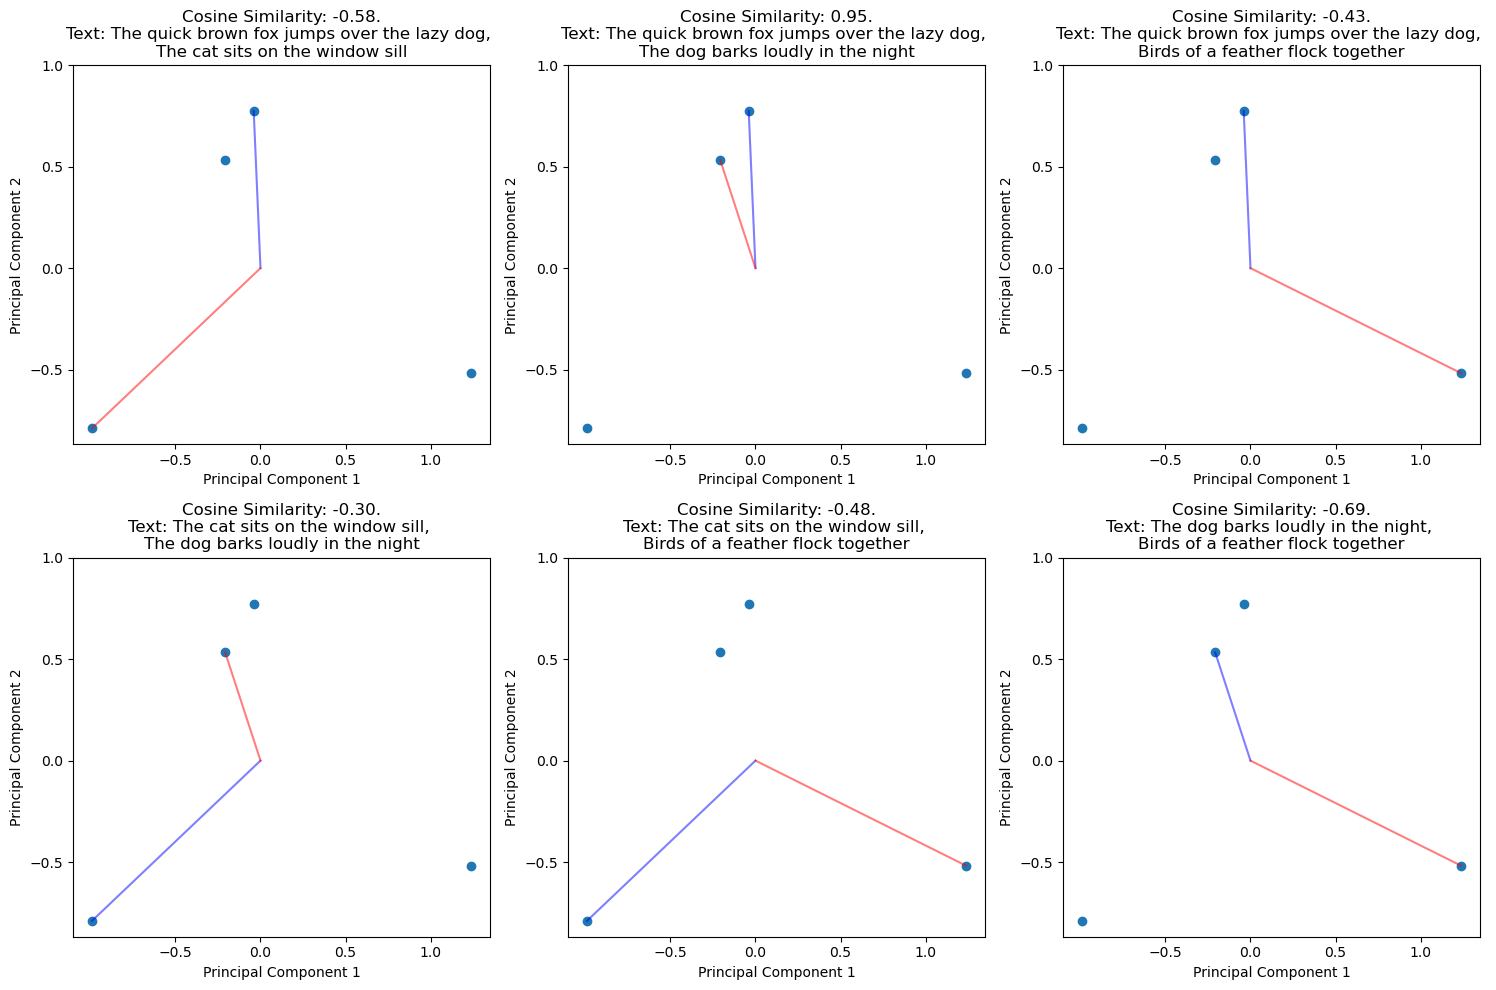

In [54]:
# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
matrix_pca = pca.fit_transform(embeddings)
# Compute cosine similarity
cos_sim = cosine_similarity(matrix_pca)


# Plot one graph per pair of text
num_pairs = len(corpus) * (len(corpus) - 1) // 2
plt.figure(figsize=(15, 10))
subplot_index = 1
for i in range(len(corpus)):
    for j in range(i + 1, len(corpus)):
        plt.subplot(2, num_pairs // 2, subplot_index)
        plt.scatter(matrix_pca[:, 0], matrix_pca[:, 1])
        plt.plot([0, matrix_pca[i, 0]], 
                 [0, matrix_pca[i, 1]], 
                 linestyle='-', color='blue', alpha=0.5)
        plt.plot([0, matrix_pca[j, 0]], 
                 [0, matrix_pca[j, 1]], 
                 linestyle='-', color='red', alpha=0.5)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'Cosine Similarity: {cos_sim[i, j]:.2f}.\nText: {corpus[i]}, \n{corpus[j]}')
        plt.xticks(np.arange(-0.5, 1.5, 0.5))
        plt.yticks(np.arange(-0.5, 1.5, 0.5))
        subplot_index += 1
plt.tight_layout()
plt.show()

In [55]:
# Training Glove Embeddings
# Source: https://colab.research.google.com/drive/1IxAnnFSqk3mL3A8n1PKYWdEzDSd2Y9rF?usp=sharing#scrollTo=DpONsaktz-8w
# https://medium.com/nerd-for-tech/implementing-glove-from-scratch-word-embedding-for-transformers-95503138d65
# 
import numpy as np
from collections import defaultdict

corpus = [
    "I love chocolate",
    "I love ice cream",
    "I enjoy playing tennis"
]
# Initialize vocabulary and co-occurrence matrix
vocab = set()
co_occurrence = defaultdict(float)

window_size = 4
# Iterate through the corpus to build vocabulary and co-occurrence matrix
for sentence in corpus:
    words = sentence.split()
    for i in range(len(words)):
        word = words[i]
        vocab.add(word)
        for j in range(max(0, i - window_size), min(i + window_size + 1, len(words))):
            if i != j:
                co_occurrence[(word, words[j])] += 1.0 / abs(i - j)

In [56]:
co_occurrence

defaultdict(float,
            {('I', 'love'): 2.0,
             ('I', 'chocolate'): 0.5,
             ('love', 'I'): 2.0,
             ('love', 'chocolate'): 1.0,
             ('chocolate', 'I'): 0.5,
             ('chocolate', 'love'): 1.0,
             ('I', 'ice'): 0.5,
             ('I', 'cream'): 0.3333333333333333,
             ('love', 'ice'): 1.0,
             ('love', 'cream'): 0.5,
             ('ice', 'I'): 0.5,
             ('ice', 'love'): 1.0,
             ('ice', 'cream'): 1.0,
             ('cream', 'I'): 0.3333333333333333,
             ('cream', 'love'): 0.5,
             ('cream', 'ice'): 1.0,
             ('I', 'enjoy'): 1.0,
             ('I', 'playing'): 0.5,
             ('I', 'tennis'): 0.3333333333333333,
             ('enjoy', 'I'): 1.0,
             ('enjoy', 'playing'): 1.0,
             ('enjoy', 'tennis'): 0.5,
             ('playing', 'I'): 0.5,
             ('playing', 'enjoy'): 1.0,
             ('playing', 'tennis'): 1.0,
             ('tennis', 'I'):

In [57]:
embedding_dim = 10
word_embeddings = {
    word: np.random.randn(embedding_dim) for word in vocab
}

learning_rate = 0.1
num_epochs = 100

# Gradient descent to update word embeddings
for epoch in range(num_epochs):
    total_loss = 0
    for (word_i, word_j), observed_count in co_occurrence.items():
        # Calculate dot product of word embeddings
        dot_product = np.dot(word_embeddings[word_i], word_embeddings[word_j])

        # Calculate difference and update
        diff = dot_product - np.log(observed_count)
        total_loss += 0.5 * diff**2
        gradient = diff * word_embeddings[word_j]
        word_embeddings[word_i] -= learning_rate * gradient

    print(f"Epoch: {epoch+1}, Loss: {total_loss}")

Epoch: 1, Loss: 39.365947488606075
Epoch: 2, Loss: 1.9149512669286366
Epoch: 3, Loss: 0.49729823369629306
Epoch: 4, Loss: 0.25626873443404424
Epoch: 5, Loss: 0.13492074153584865
Epoch: 6, Loss: 0.07177637909791297
Epoch: 7, Loss: 0.03832690340729321
Epoch: 8, Loss: 0.020553047101204078
Epoch: 9, Loss: 0.01105695330310373
Epoch: 10, Loss: 0.005964461491108246
Epoch: 11, Loss: 0.003224560499356721
Epoch: 12, Loss: 0.00174644192321435
Epoch: 13, Loss: 0.0009472667935481374
Epoch: 14, Loss: 0.000514401049957583
Epoch: 15, Loss: 0.00027960351566206845
Epoch: 16, Loss: 0.00015209464804903544
Epoch: 17, Loss: 8.278487613824698e-05
Epoch: 18, Loss: 4.508188371981712e-05
Epoch: 19, Loss: 2.4559851046221176e-05
Epoch: 20, Loss: 1.3384094683046167e-05
Epoch: 21, Loss: 7.295674906856275e-06
Epoch: 22, Loss: 3.977718221339067e-06
Epoch: 23, Loss: 2.169090455176518e-06
Epoch: 24, Loss: 1.1829946240660753e-06
Epoch: 25, Loss: 6.4526531540145e-07
Epoch: 26, Loss: 3.5199410698314477e-07
Epoch: 27, Loss